<a href="https://www.kaggle.com/code/mohamedmustafashaban/customer-data-analysis-ipynb?scriptVersionId=212308480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***1--IMPORT LIBRARY***

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input/custmer-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/custmer-data/m_L0disbTvu0C4fQXSIYNg_d137b7b970cf4848b0332975d63927e1_Using-bars-columns-and-lines.xlsx


# ***2--READ DATA_SET_EXCELSHEET***

In [2]:
file_path = '/kaggle/input/custmer-data/m_L0disbTvu0C4fQXSIYNg_d137b7b970cf4848b0332975d63927e1_Using-bars-columns-and-lines.xlsx'
data = pd.read_excel(file_path)

# ***3-information of The dataset***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product ID               80 non-null     int64         
 1   Product Category         80 non-null     object        
 2   Product Subcategory      80 non-null     object        
 3   Product Name             80 non-null     object        
 4   Product Description      80 non-null     object        
 5   Product Price            80 non-null     float64       
 6   Product Weight           80 non-null     float64       
 7   Product Size             80 non-null     object        
 8   Product Region           80 non-null     object        
 9   Product Color            80 non-null     object        
 10  Product Stock            80 non-null     int64         
 11  Order ID                 80 non-null     int64         
 12  Customer ID              80 non-null  

In [4]:
print(data.head())

   Product ID Product Category Product Subcategory      Product Name  \
0        1001   Mountain Bikes       Cross Country  TrailBlazer 1000   
1        1002   Mountain Bikes       Cross Country  TrailBlazer 2000   
2        1003       Road Bikes              Racing  SpeedMaster 1000   
3        1004       Road Bikes              Racing  SpeedMaster 2000   
4        1005    Touring Bikes       Long Distance     Explorer 1000   

                    Product Description  Product Price  Product Weight  \
0             Lightweight and versatile         1200.0            25.0   
1        High-performance mountain bike         1500.0            22.0   
2       Agile and aerodynamic road bike         1800.0            18.0   
3              Premium racing road bike         2100.0            16.0   
4  Comfortable and durable touring bike         1300.0            27.0   

  Product Size Product Region Product Color  ...  Month  Order Date  \
0            M  North America           Red  ...  A

# ***4- preprocessing of the data***

In [5]:
data.dropna(inplace=True)

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Quantity'] = data['Order Quantity'].astype(int)
data['Order Total'] = data['Order Total'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Quantity'] = data['Order Quantity'].astype(int)
data['Order Total'] = data['Product Price'] * data['Order Quantity']

In [8]:
data['Month'] = data['Order Date'].dt.month_name()

In [9]:
sales_by_category = data.groupby('Product Category')['Order Total'].sum().reset_index()

# ***5- Visualizing data***

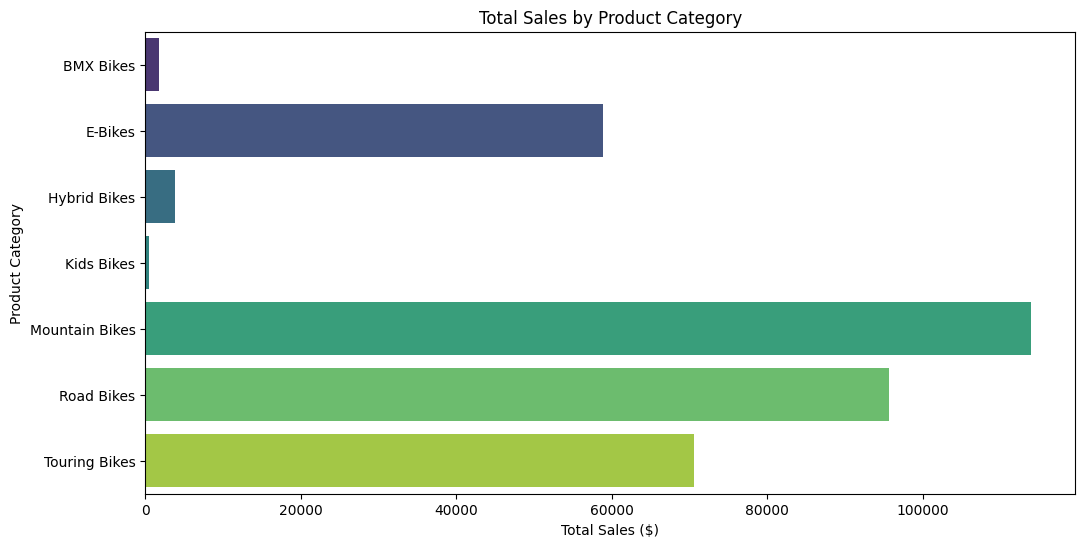

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Category', data=sales_by_category, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.show()

In [11]:
sales_by_region = data.groupby('Product Region')['Order Total'].sum().reset_index()

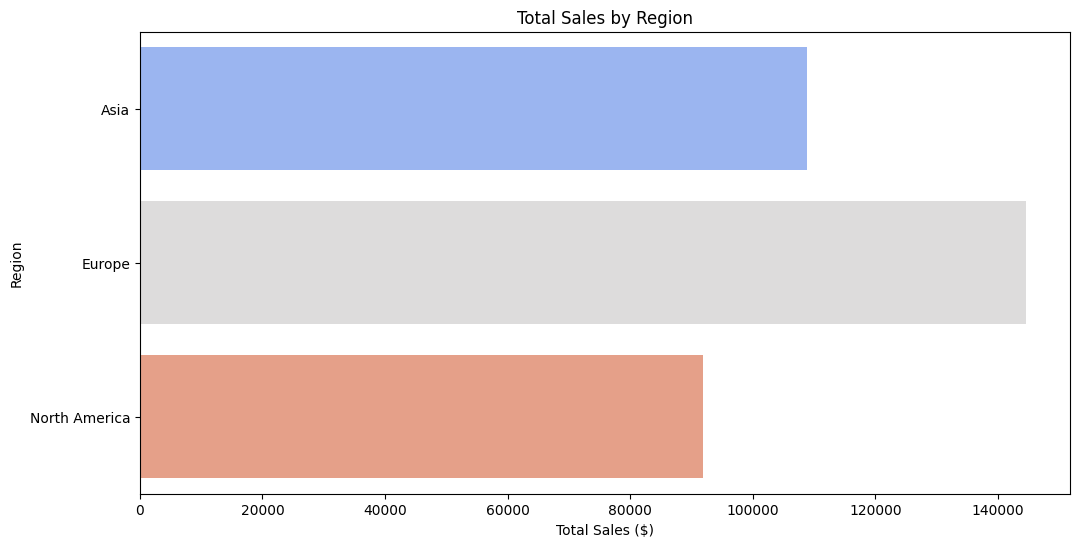

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Region', data=sales_by_region, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales ($)')
plt.ylabel('Region')
plt.show()

In [13]:
monthly_sales = data.groupby('Month')['Order Total'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

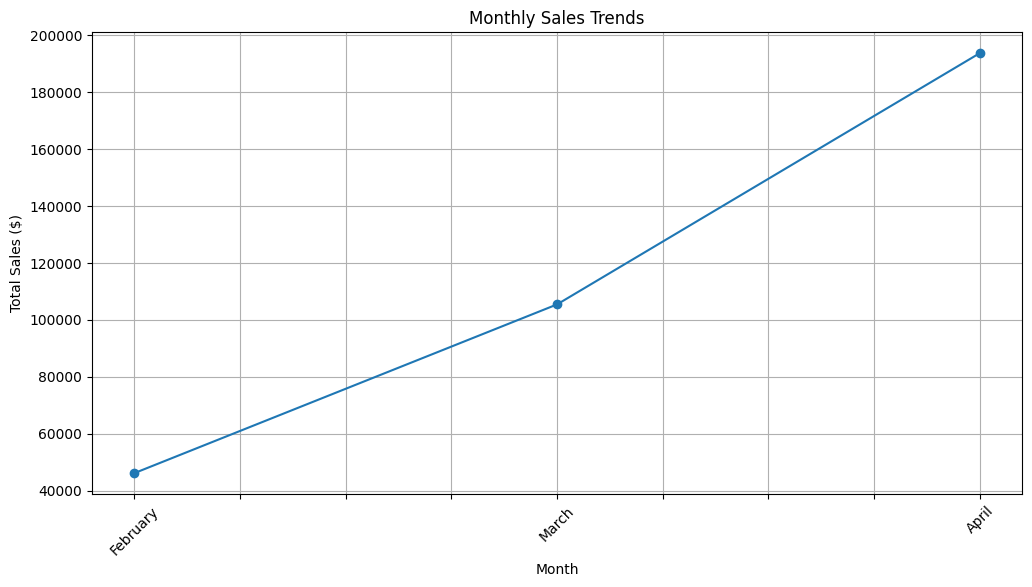

In [14]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [15]:
sales_by_payment = data.groupby('Payment Method')['Order Total'].sum().reset_index()

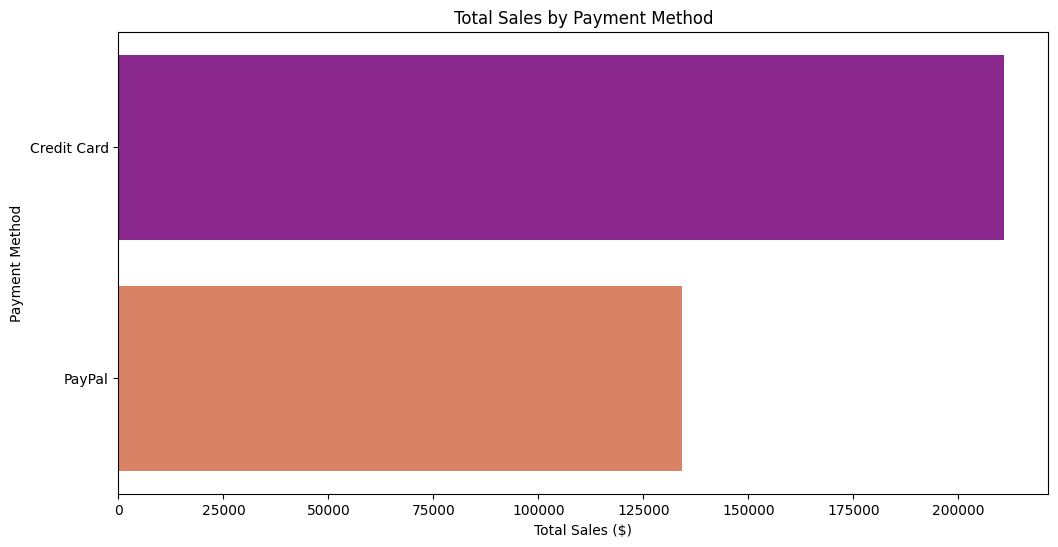

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Payment Method', data=sales_by_payment, palette='plasma')
plt.title('Total Sales by Payment Method')
plt.xlabel('Total Sales ($)')
plt.ylabel('Payment Method')
plt.show()

In [17]:
feedback_counts = data['Customer Feedback'].value_counts()

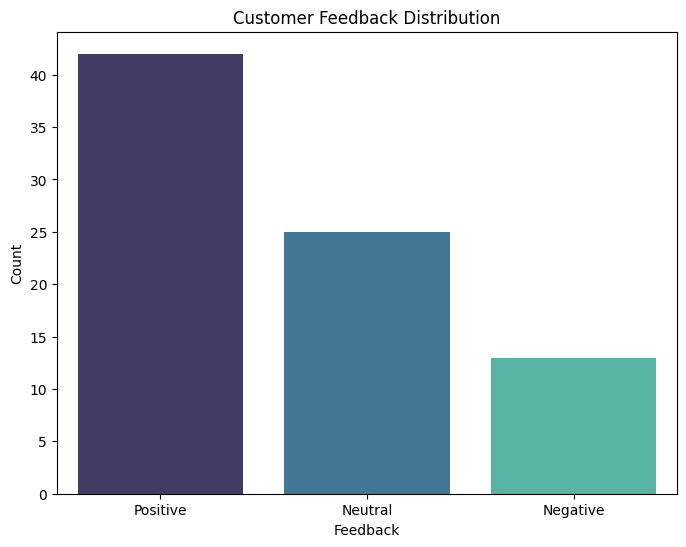

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feedback_counts.index, y=feedback_counts.values, palette='mako')
plt.title('Customer Feedback Distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

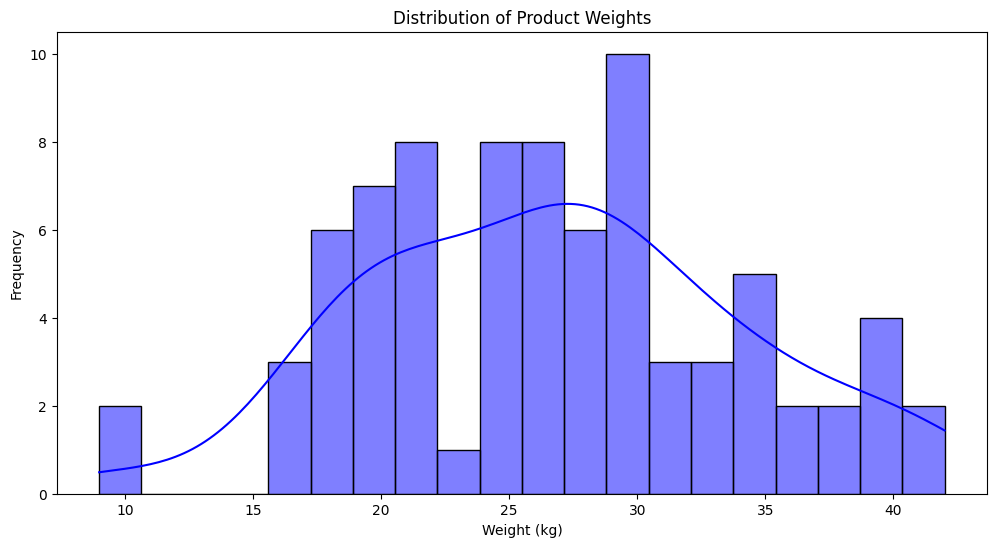

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Product Weight'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


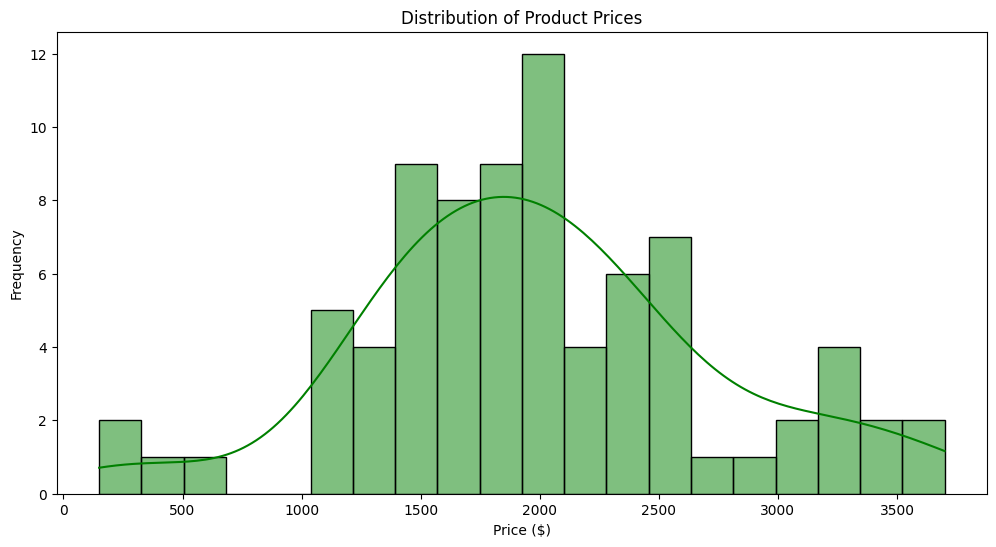

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Product Price'], bins=20, kde=True, color='green')
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

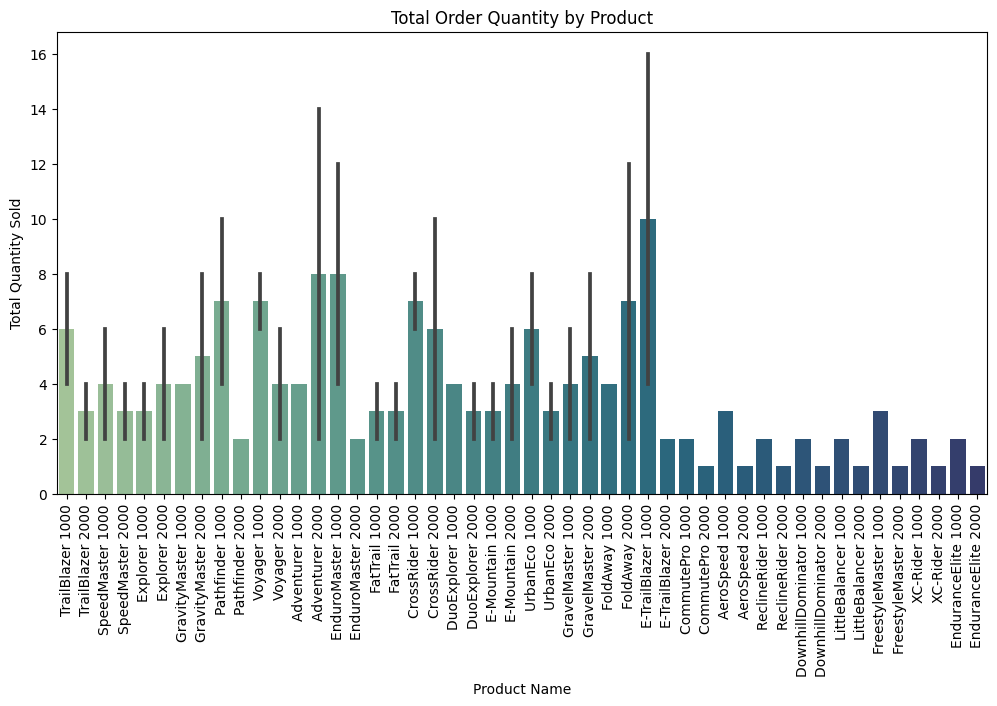

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Order Quantity', data=data, estimator=sum, palette='crest')
plt.title('Total Order Quantity by Product')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

In [22]:
sales_by_status = data.groupby('Order Status')['Order Total'].sum().reset_index()

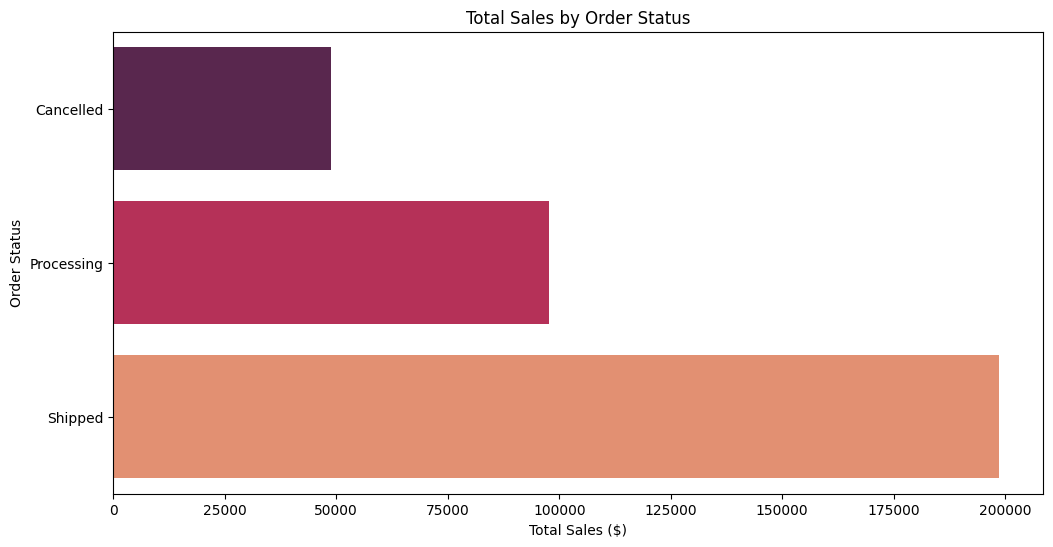

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Order Status', data=sales_by_status, palette='rocket')
plt.title('Total Sales by Order Status')
plt.xlabel('Total Sales ($)')
plt.ylabel('Order Status')
plt.show()

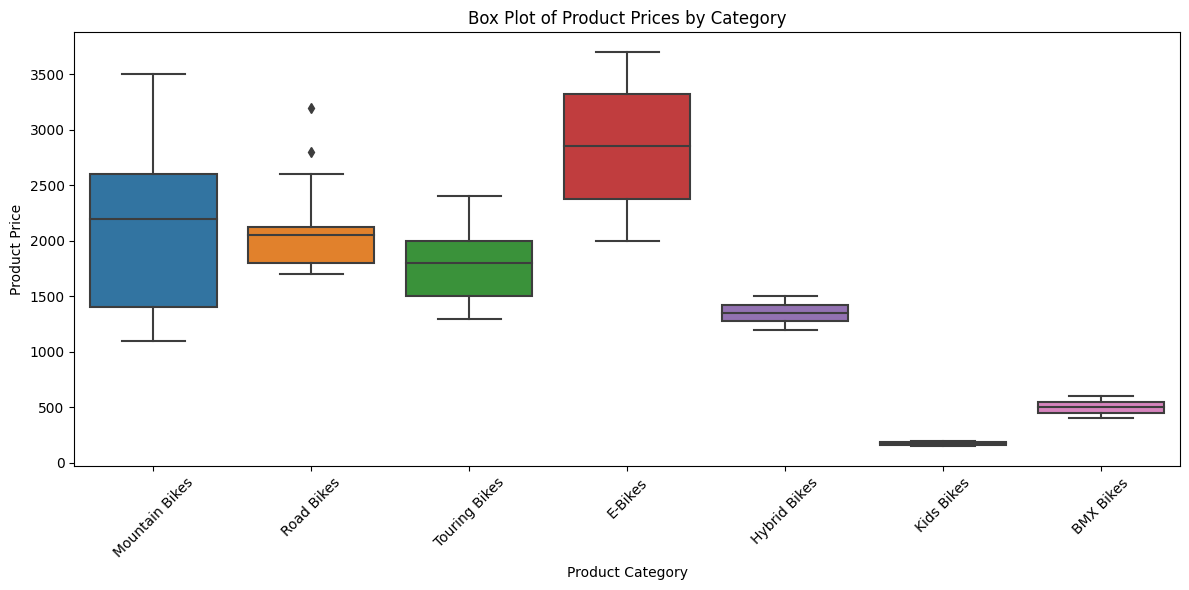

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Product Price', data=data)
plt.title('Box Plot of Product Prices by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

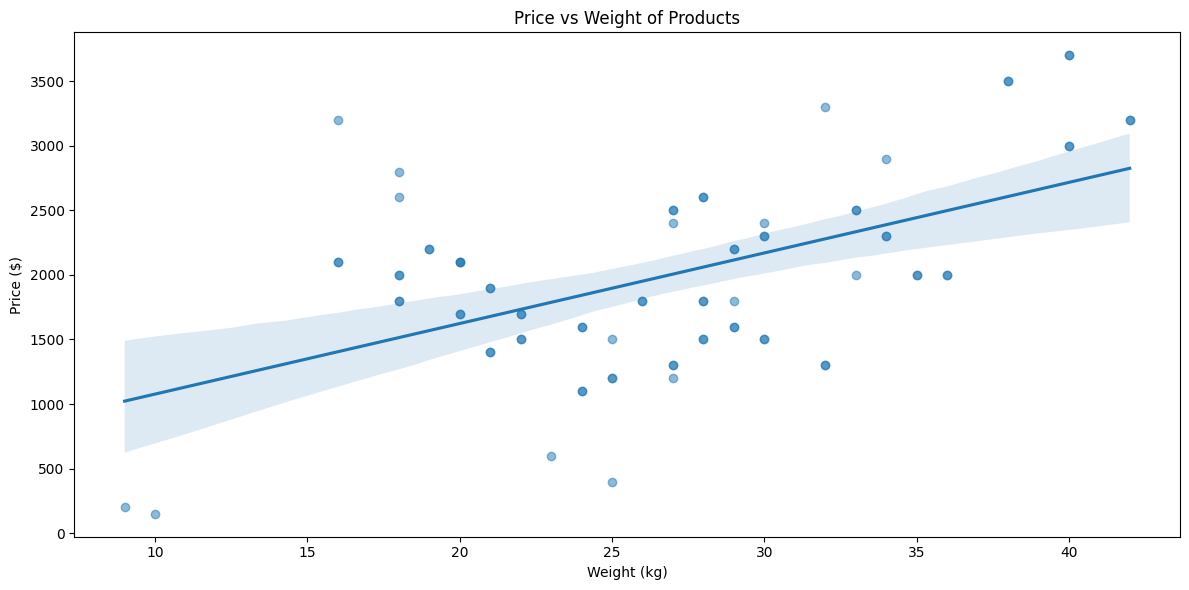

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Product Weight', y='Product Price', data=data, scatter_kws={'alpha':0.5})
plt.title('Price vs Weight of Products')
plt.xlabel('Weight (kg)')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

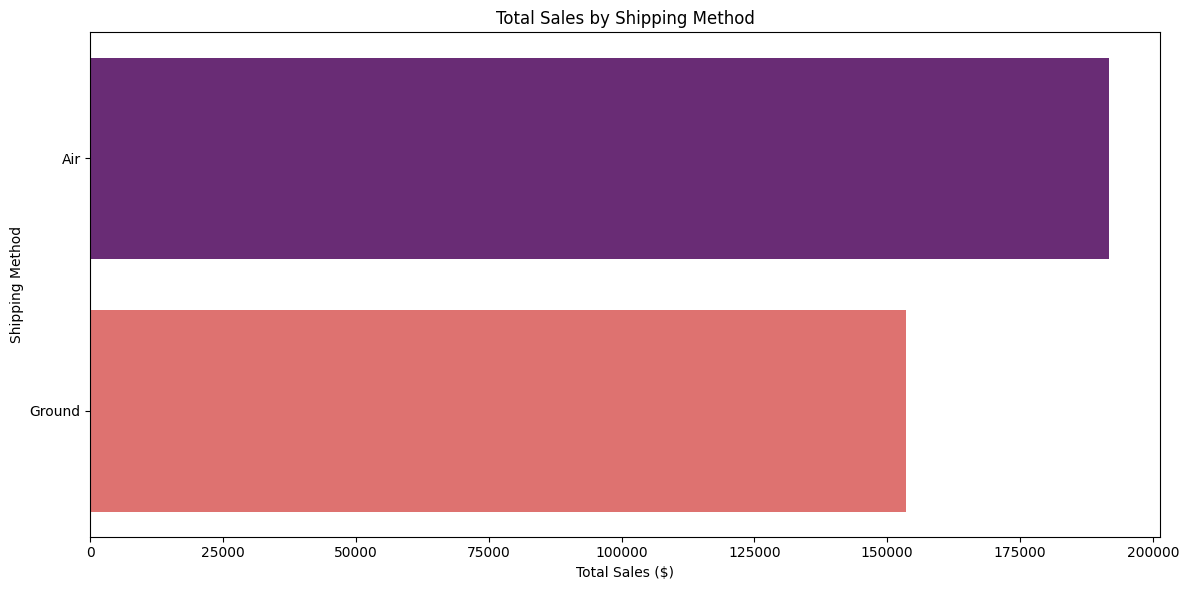

In [26]:
sales_by_shipping = data.groupby('Shipping Method')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Shipping Method', data=sales_by_shipping, palette='magma')
plt.title('Total Sales by Shipping Method')
plt.xlabel('Total Sales ($)')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()

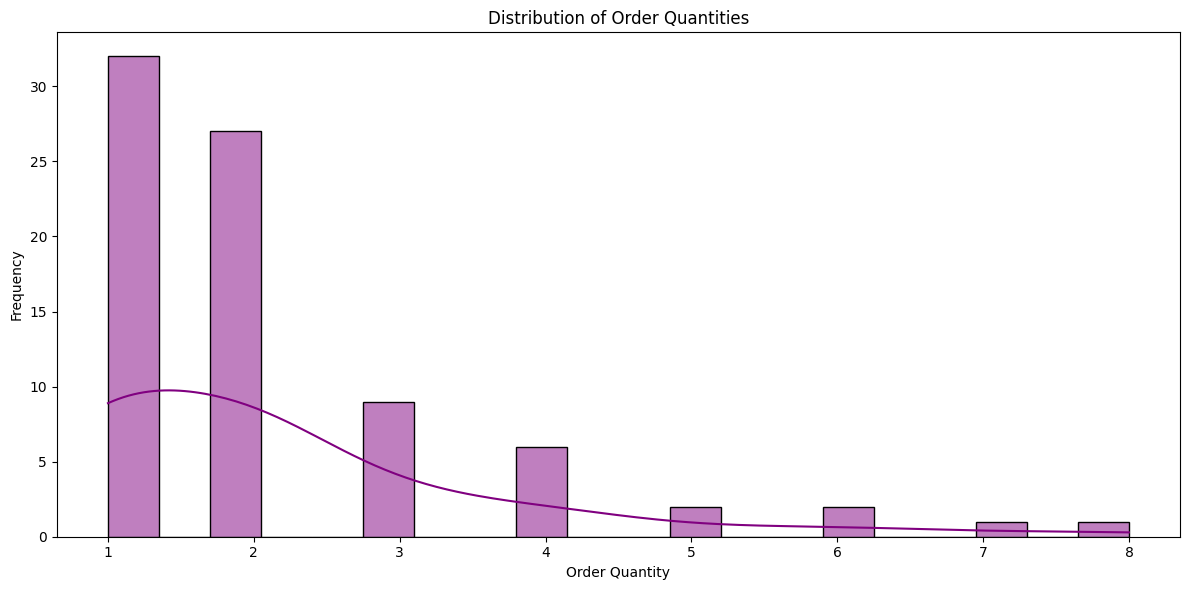

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Order Quantity'], bins=20, kde=True, color='purple')
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

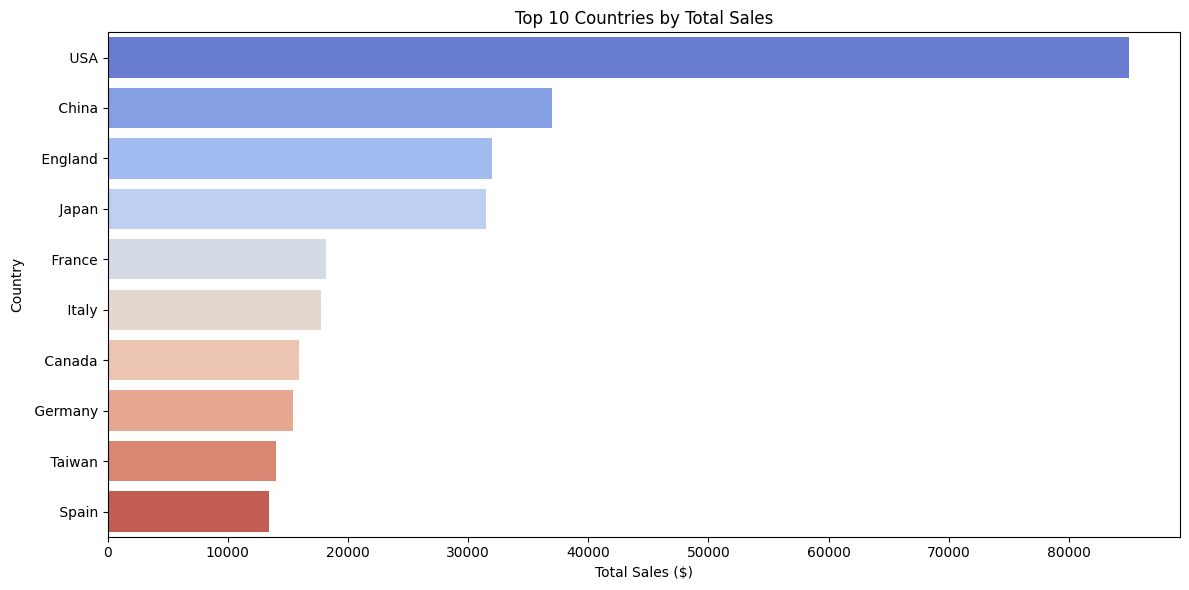

In [28]:
sales_by_country = data.groupby('Customer Location')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Customer Location', data=sales_by_country.sort_values('Order Total', ascending=False).head(10), palette='coolwarm')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

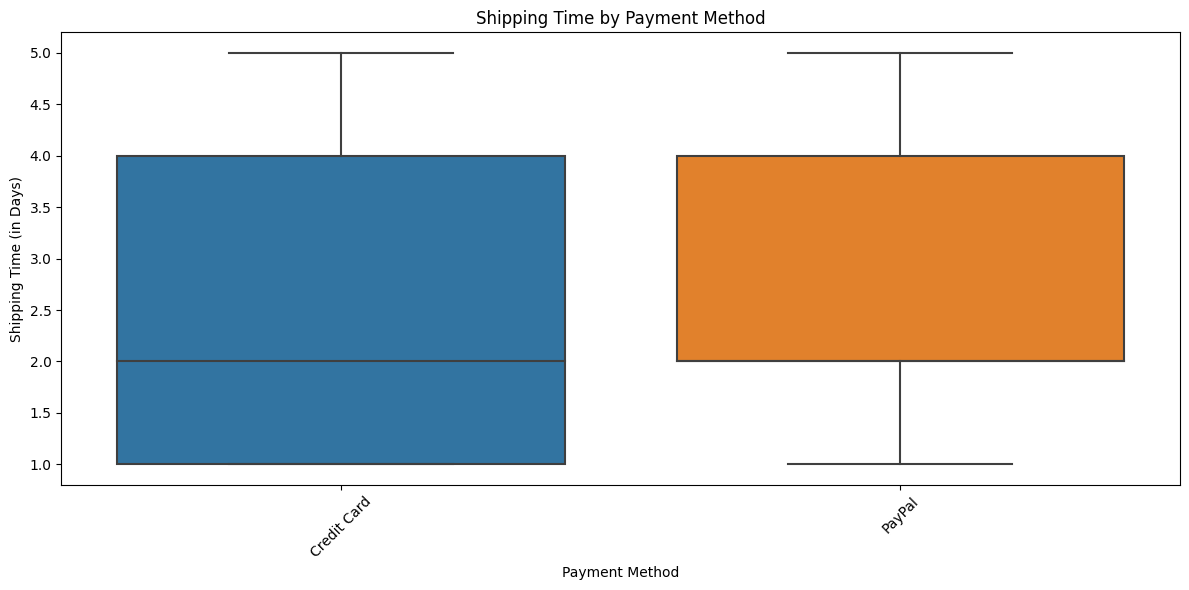

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment Method', y='Shipping Time (in Days)', data=data)
plt.title('Shipping Time by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

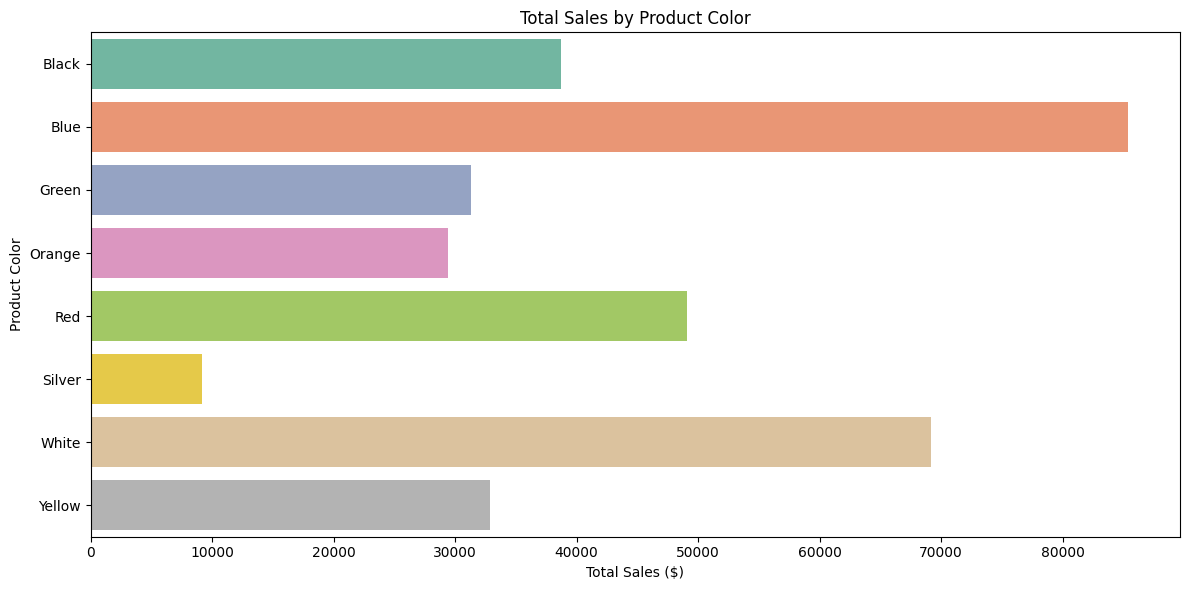

In [30]:
sales_by_color = data.groupby('Product Color')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Color', data=sales_by_color, palette='Set2')
plt.title('Total Sales by Product Color')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Color')
plt.tight_layout()
plt.show()

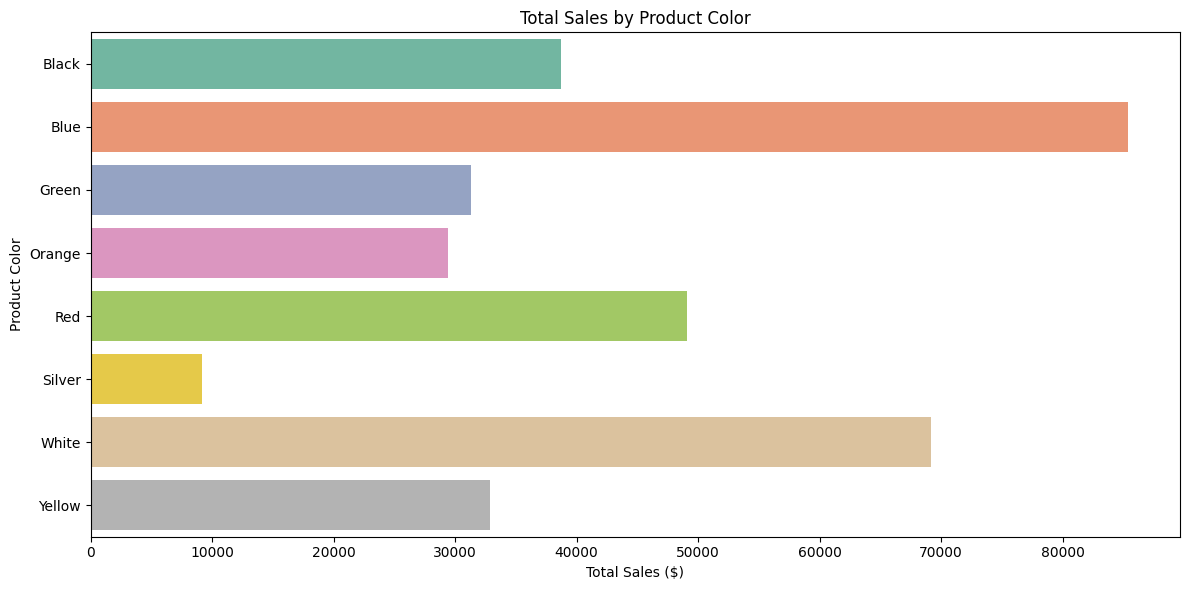

In [31]:
sales_by_color = data.groupby('Product Color')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Color', data=sales_by_color, palette='Set2')
plt.title('Total Sales by Product Color')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Color')
plt.tight_layout()
plt.show()

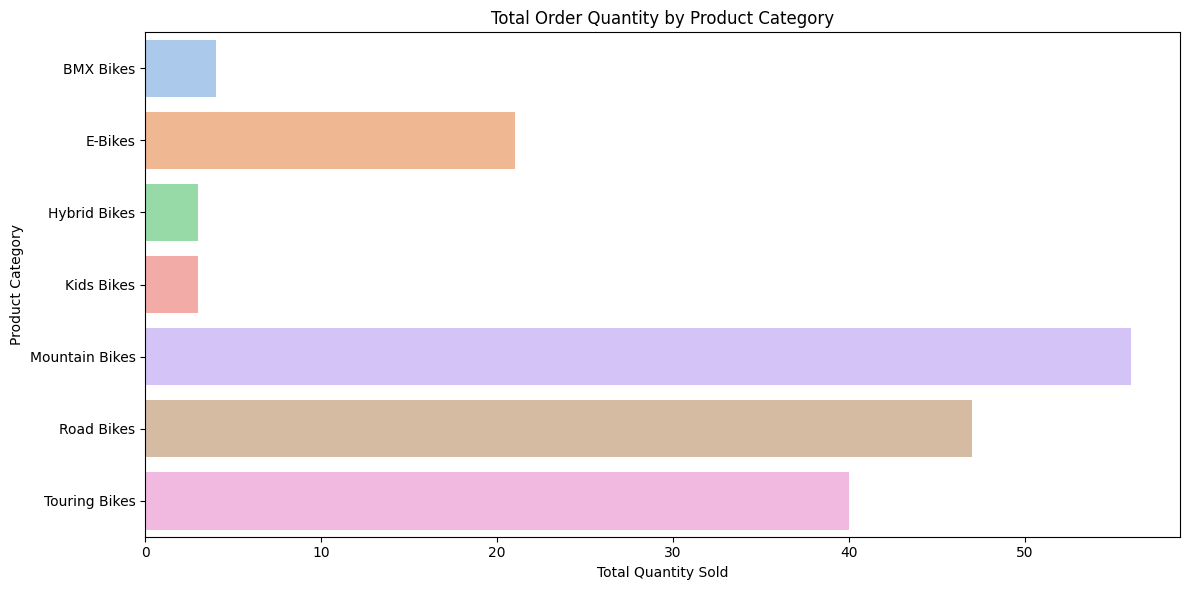

In [32]:
quantity_by_category = data.groupby('Product Category')['Order Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Quantity', y='Product Category', data=quantity_by_category, palette='pastel')
plt.title('Total Order Quantity by Product Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

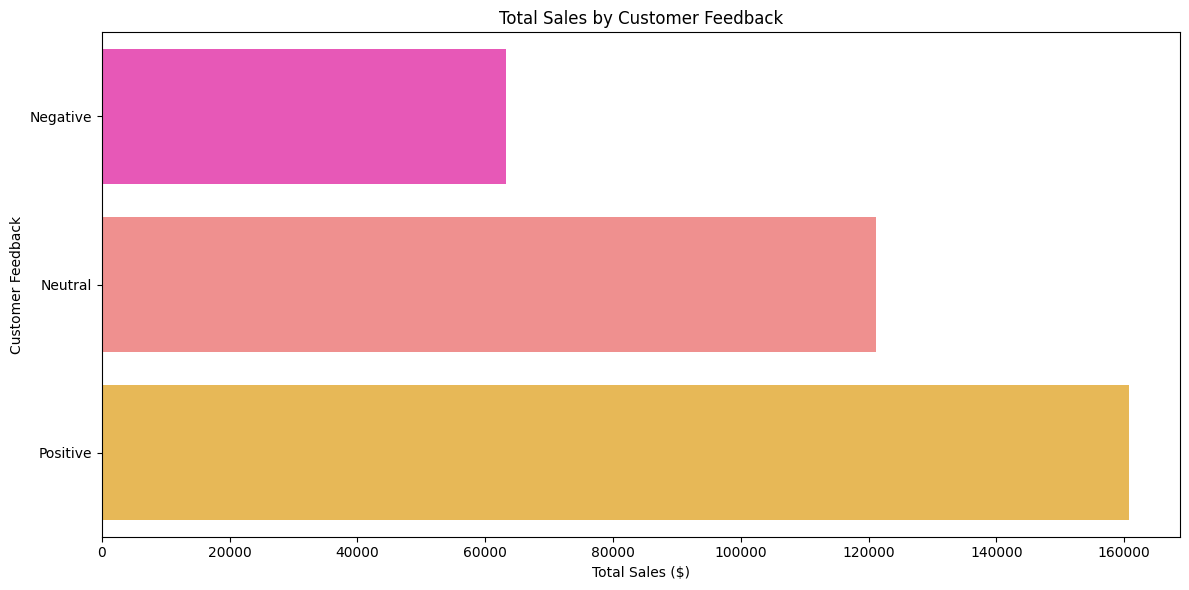

In [33]:
sales_by_feedback = data.groupby('Customer Feedback')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Customer Feedback', data=sales_by_feedback, palette='spring')
plt.title('Total Sales by Customer Feedback')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Feedback')
plt.tight_layout()
plt.show()

# ***6--spliting data and select the features***

In [34]:
features = data[['Product Price', 'Product Weight', 'Order Quantity']]
target = data['Order Total']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ***7-- training the models***

In [36]:

def train_model(X_train, y_train):
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()
    }
    
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model
    return results

# ***8--evaluatino the models***

In [37]:
def evaluate_models(models, X_test, y_test):
   
    results = {}
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {
            'Mean Squared Error': mse,
            'R^2 Score': r2
        }
    return results


In [38]:
def print_results(results):
    for model_name, metrics in results.items():
        print(f'Model: {model_name}')
        print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
        print(f"  R^2 Score: {metrics['R^2 Score']:.2f}\n")
        

models = train_model(X_train, y_train)
results = evaluate_models(models, X_test, y_test)
print_results(results)

Model: Linear Regression
  Mean Squared Error: 4397618.79
  R^2 Score: 0.86

Model: Random Forest
  Mean Squared Error: 10944955.25
  R^2 Score: 0.66

Model: Gradient Boosting
  Mean Squared Error: 8229306.91
  R^2 Score: 0.74



# ***9--ploting the results***

Model: Linear Regression
  Mean Squared Error: 4397618.79
  R^2 Score: 0.86

Model: Random Forest
  Mean Squared Error: 10944955.25
  R^2 Score: 0.66

Model: Gradient Boosting
  Mean Squared Error: 8229306.91
  R^2 Score: 0.74



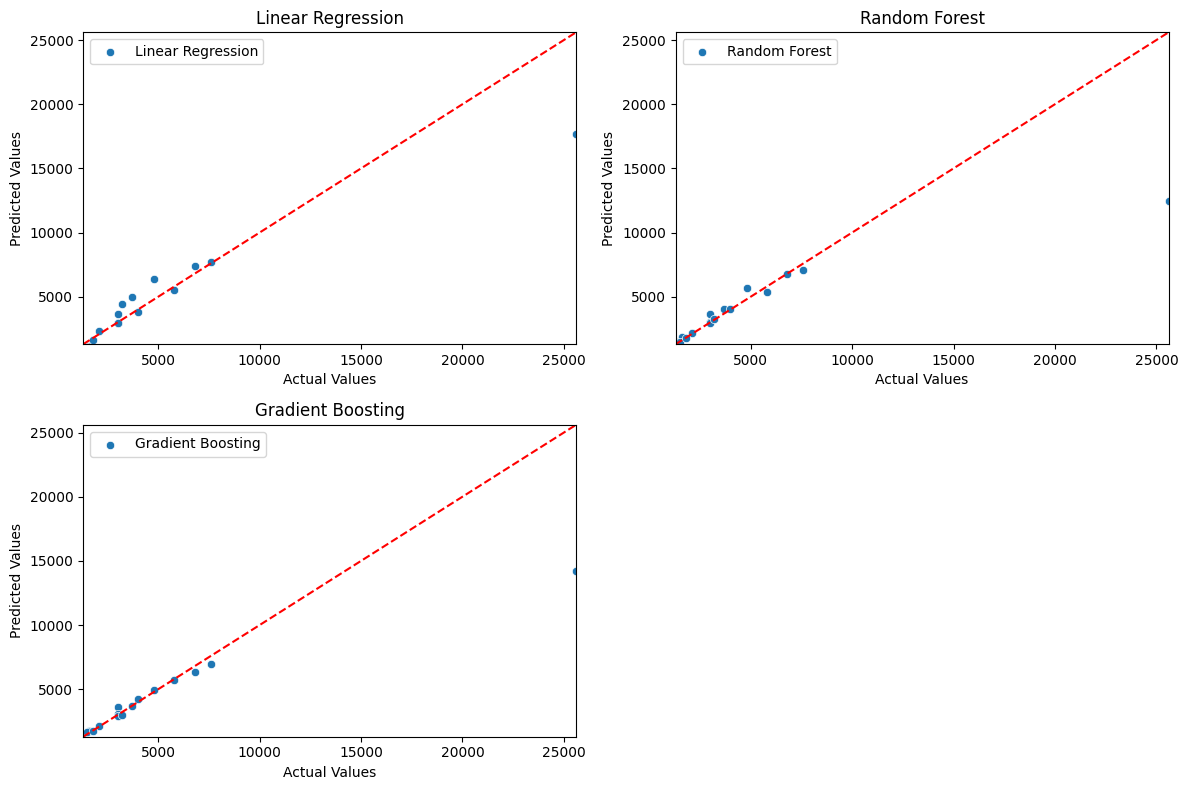

In [39]:
def plot_results(models, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    for i, (model_name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        plt.subplot(2, 2, i + 1)
        sns.scatterplot(x=y_test, y=y_pred, label=model_name)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط مرجعي
        plt.title(model_name)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.xlim(y_test.min(), y_test.max())
        plt.ylim(y_test.min(), y_test.max())
    
    plt.tight_layout()
    plt.show()
print_results(results)
plot_results(models, X_test, y_test)

In [40]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import json
import os

class Backend:
    def __init__(self):
        self.data_file = "messages.json"
        self.messages = []
        self.load_data()
    
    def load_data(self):
        try:
            if os.path.exists(self.data_file):
                with open(self.data_file, 'r') as file:
                    self.messages = json.load(file)
        except Exception as e:
            print(f"Error loading data: {e}")
    
    def save_data(self):
        try:
            with open(self.data_file, 'w') as file:
                json.dump(self.messages, file)
        except Exception as e:
            print(f"Error saving data: {e}")
    
    def add_message(self, message):
        if message.strip():
            self.messages.append(message)
            self.save_data()
            return True
        return False
    
    def get_messages(self):
        return self.messages

In [41]:


class GUI:
    def __init__(self, root):
        self.root = root
        self.backend = Backend()
        self.root.title("Message Application")
        self.root.geometry("400x500")
        self.create_widgets()
        
    def create_widgets(self):
        # Create main frame
        main_frame = ttk.Frame(self.root, padding="10")
        main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
        
        # Message input
        self.message_var = tk.StringVar()
        message_entry = ttk.Entry(main_frame, textvariable=self.message_var)
        message_entry.grid(row=0, column=0, padx=5, pady=5, sticky=tk.EW)
        
        # Add message button
        add_button = ttk.Button(main_frame, text="Add Message", command=self.add_message)
        add_button.grid(row=0, column=1, padx=5, pady=5)
        
        # Messages display area
        self.messages_text = tk.Text(main_frame, height=20, width=40)
        self.messages_text.grid(row=1, column=0, columnspan=2, padx=5, pady=5)
        
        # Refresh button
        refresh_button = ttk.Button(main_frame, text="Refresh", command=self.refresh_messages)
        refresh_button.grid(row=2, column=0, columnspan=2, pady=5)
        
        # Configure grid weights
        main_frame.columnconfigure(0, weight=1)
        self.root.columnconfigure(0, weight=1)
        
        # Initial display of messages
        self.refresh_messages()
        
    def add_message(self):
        message = self.message_var.get()
        if self.backend.add_message(message):
            self.message_var.set("")  # Clear input
            self.refresh_messages()
        else:
            messagebox.showwarning("Warning", "Please enter a valid message!")
    
    def refresh_messages(self):
        self.messages_text.delete(1.0, tk.END)
        messages = self.backend.get_messages()
        for msg in messages:
            self.messages_text.insert(tk.END, f"{msg}\n")



In [ ]:
def main():
    root = tk.Tk()
    app = GUI(root)
    root.mainloop()

if __name__ == "__main__":
    main()

# ***10--thank you***